# Importando base de dados

In [71]:
import pandas as pd

In [72]:
pd.read_csv('tips_atualizado.csv')

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


In [73]:
dados = pd.read_csv('tips_atualizado.csv')

In [74]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [75]:
renomear = {
    'total_bill': 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day': 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size': 'total_de_pessoas'
}
gorjetas = dados.rename(columns = renomear)
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [76]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [77]:
sim_nao = {
    'No': 'Não', 
    'Yes': 'Sim'
}

In [78]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [79]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [80]:
dias = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado', 
    'Thur': 'Quinta', 
    'Fri': 'Sexta'
}

In [81]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [82]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [83]:
hora = {
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
}

In [84]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importantdo o Seaborn

In [85]:
import seaborn as sns

In [86]:
!pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\matca\anaconda3\lib\site-packages
Requires: numpy, scipy, pandas, matplotlib
Required-by: 


# Análise 1 - Valor da conta e gorjeta

In [87]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

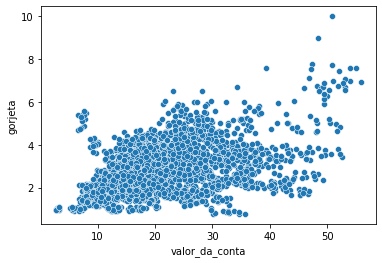

In [88]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [89]:
print(f'A base de dados contém {gorjetas.shape[0]} registros\n')
print(f'Registros não nulos')
gorjetas.count()

A base de dados contém 3416 registros

Registros não nulos


valor_da_conta      3416
gorjeta             3416
sobremesa           3416
dia_da_semana       3416
hora_do_dia         3416
total_de_pessoas    3416
dtype: int64

## Criando o campo porcentagem

In [90]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [91]:
gorjetas['porcentagem'] = gorjetas.gorjeta / gorjetas.valor_da_conta

In [92]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447


In [93]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


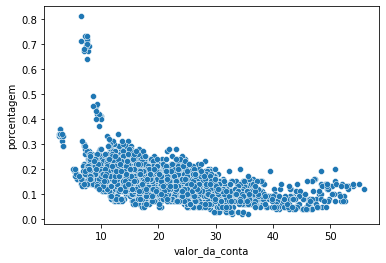

In [94]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

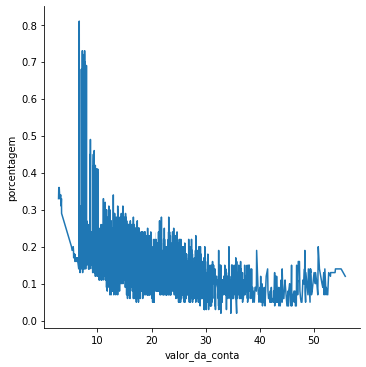

In [95]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line' , data = gorjetas)

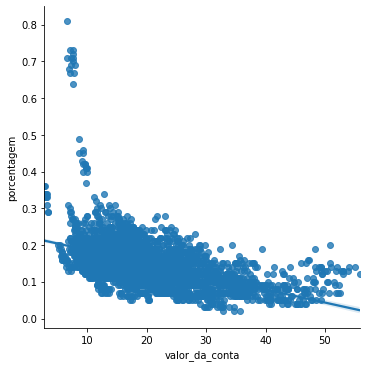

In [96]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

# Análise 2 - Sobremesa

In [97]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [98]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [99]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


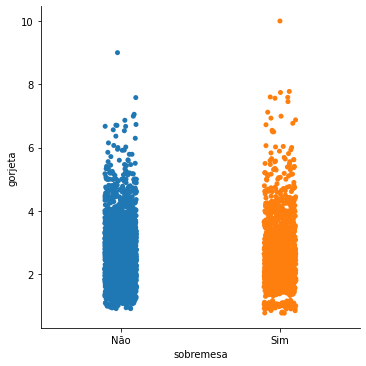

In [100]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

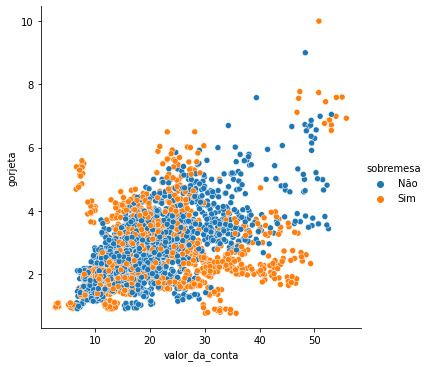

In [101]:
sns.relplot(x='valor_da_conta', y='gorjeta', data = gorjetas, hue='sobremesa')

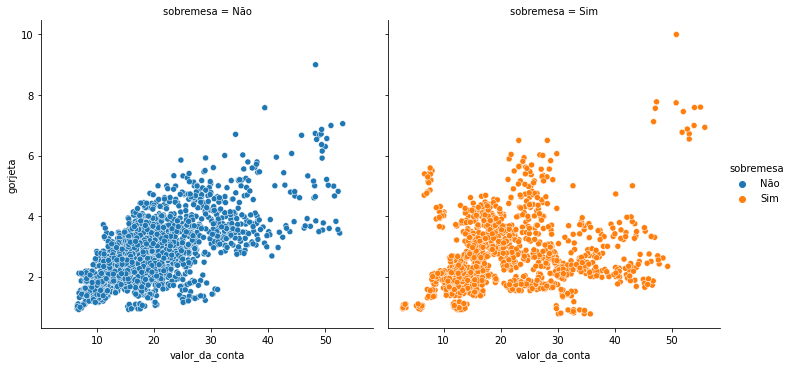

In [102]:
sns.relplot(x='valor_da_conta', y='gorjeta', data = gorjetas, hue='sobremesa', col='sobremesa')

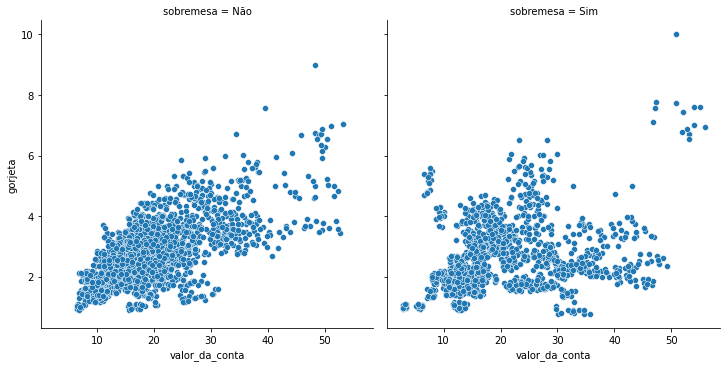

In [103]:
sns.relplot(x='valor_da_conta', y='gorjeta', data = gorjetas, col='sobremesa')

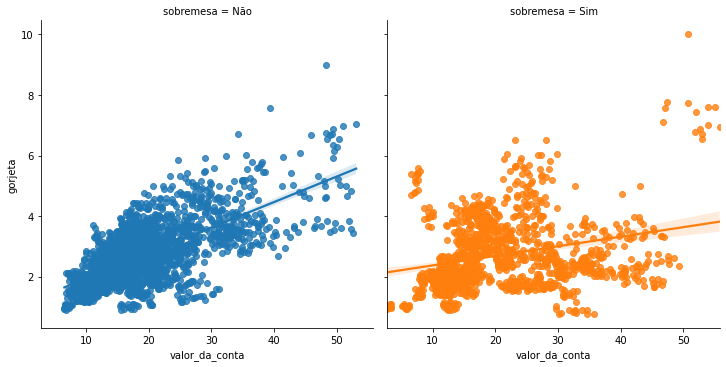

In [104]:
sns.lmplot(x='valor_da_conta', y='gorjeta', data = gorjetas, hue='sobremesa', col='sobremesa')

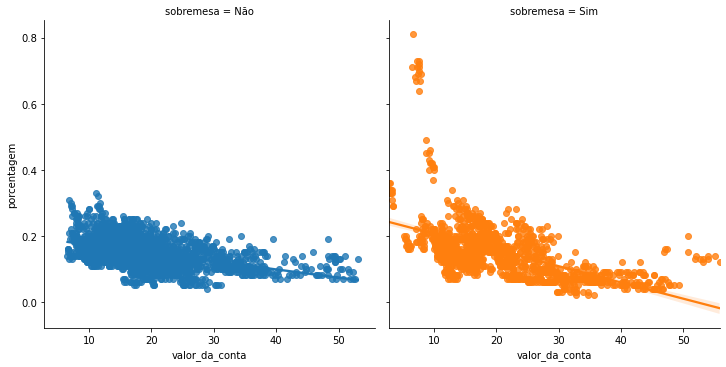

In [105]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data = gorjetas, hue='sobremesa', col='sobremesa')

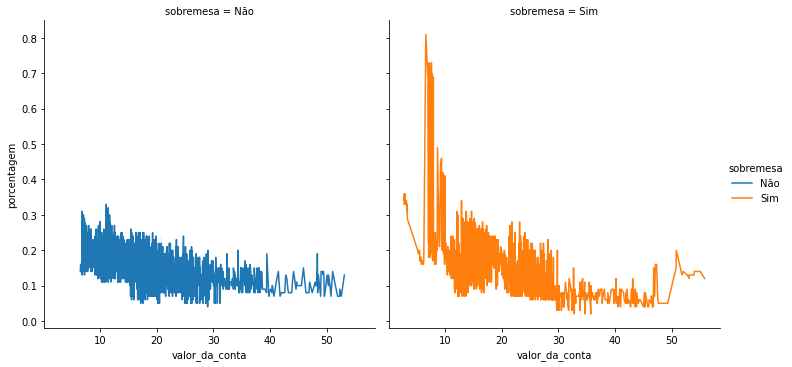

In [106]:
sns.relplot(x='valor_da_conta', y='porcentagem', data = gorjetas, col='sobremesa', hue = 'sobremesa', kind = 'line')

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e os que não pediram**

## Teste de hipótese

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [107]:
from scipy.stats import ranksums

In [108]:
sobremesa = gorjetas.query('sobremesa == "Sim"').porcentagem

In [109]:
sem_sobremesa = gorjetas.query('sobremesa == "Não"').porcentagem

In [110]:
r = ranksums(sobremesa, sem_sobremesa)
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.033144013617673405


**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

# Análise 3 - Dia da Semana

In [111]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [112]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

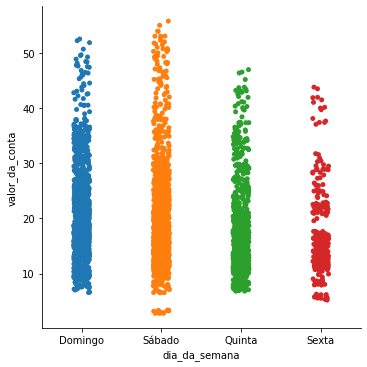

In [113]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

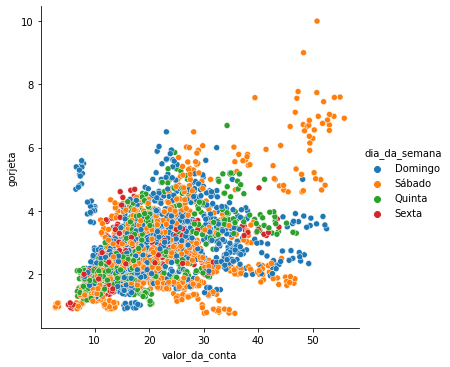

In [114]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

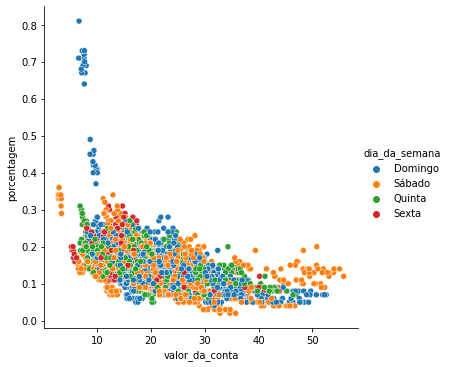

In [115]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas)

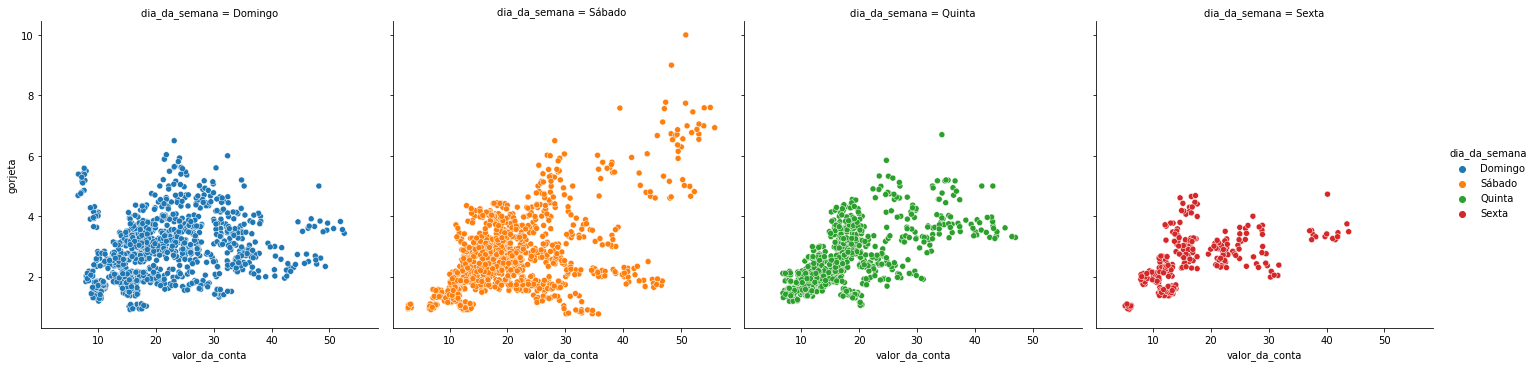

In [116]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col='dia_da_semana', data = gorjetas)

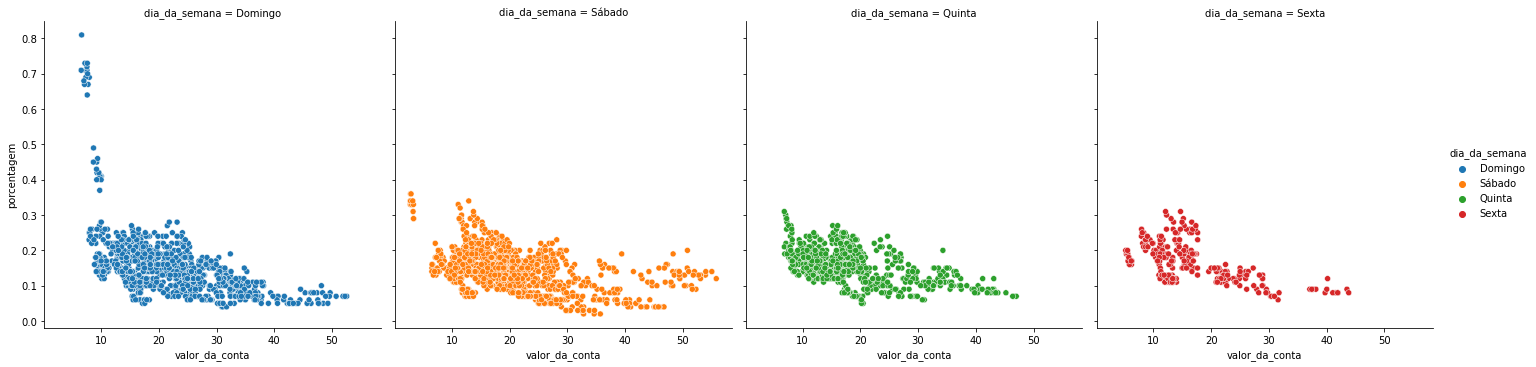

In [117]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col='dia_da_semana', data = gorjetas)

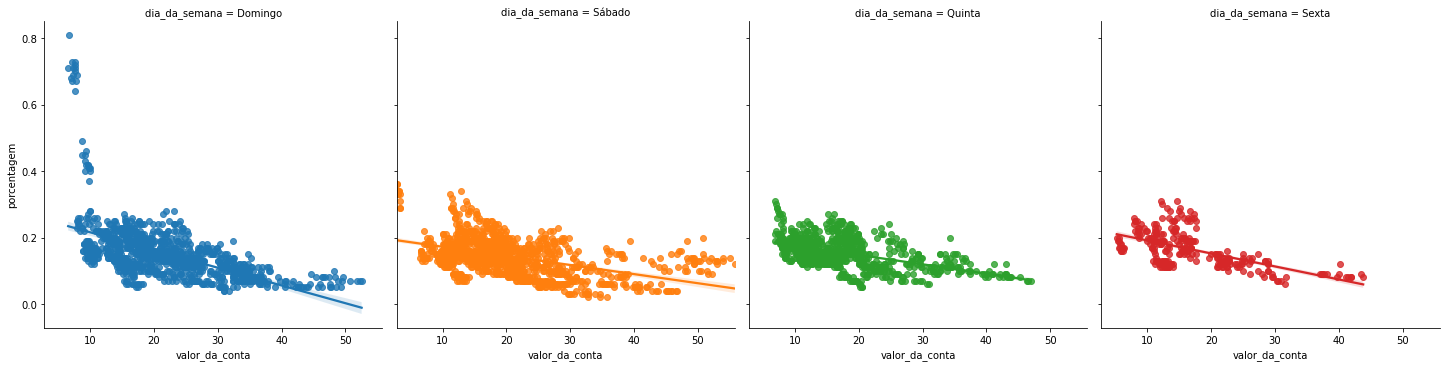

In [118]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col='dia_da_semana', data = gorjetas)

In [119]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [120]:
print(f'A média geral das gorjetas é de {media_geral_gorjetas}')

A média geral das gorjetas é de 2.7111892140916103


In [121]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,0.154953
Quinta,17.724088,2.556177,0.154090
Sexta,17.215616,2.549960,0.163158
Sábado,20.480249,2.690114,0.143604


In [122]:
print('Frequência dos dias: ')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias: 


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [123]:
valor_conta_domingo = gorjetas.query('dia_da_semana == "Domingo"').valor_da_conta

In [124]:
valor_conta_sabado = gorjetas.query('dia_da_semana == "Sábado"').valor_da_conta

In [125]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.0004435935681441821


**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no sábado e no domingo**

# Análise 4 - Hora do dia

In [126]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [127]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

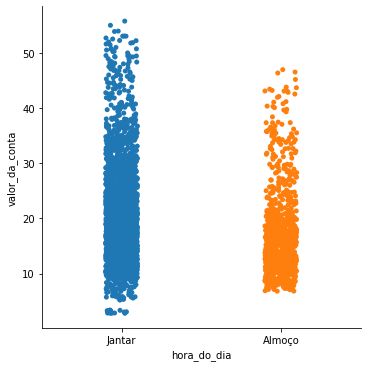

In [128]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

C:\Users\matca\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\matca\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


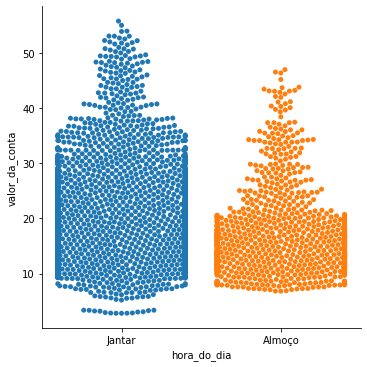

In [129]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

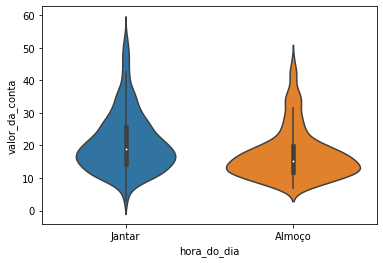

In [130]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

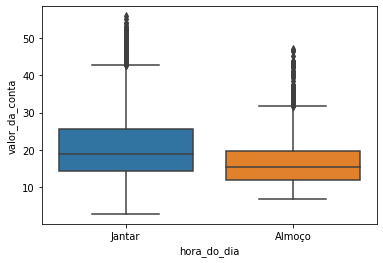

In [131]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data = gorjetas)

In [132]:
almoco = gorjetas.query('hora_do_dia == "Almoço"').valor_da_conta

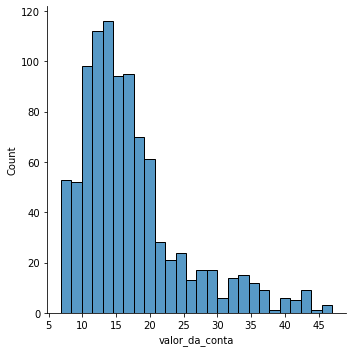

In [133]:
sns.displot(almoco)

In [134]:
jantar = gorjetas.query('hora_do_dia == "Jantar"').valor_da_conta

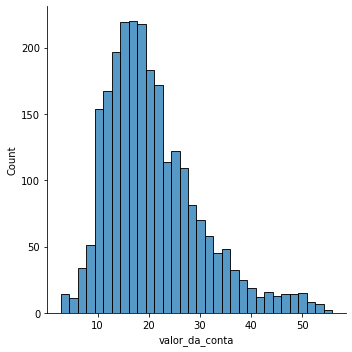

In [135]:
sns.displot(jantar)

In [136]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


## Teste de Hipótese

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [137]:
r3 = ranksums(jantar, almoco)
print(f'O valor do p-value é de {r3.pvalue}')

O valor do p-value é de 5.169201062207143e-34


**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

## Teste de hipótese 2

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [138]:
porcentagem_almoco = gorjetas.query('hora_do_dia == "Almoço"').porcentagem

In [139]:
porcentagem_jantar = gorjetas.query('hora_do_dia == "Jantar"').porcentagem

In [140]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)
print(f'O valor do p-value é de {r4}')

O valor do p-value é de RanksumsResult(statistic=6.760141268743677, pvalue=1.3785725618355523e-11)


**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**